In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve


# My personal module to acquire needed dataframe
import src.wrangle_zillow as wr


# displays dataframe numbers in a more human readable format
pd.options.display.float_format = '{:20,.2f}'.format


# module for fixing imported modules
from importlib import reload

#change display option to allow for 10 items to be displayed per cell
pd.options.display.max_rows = 10

In [43]:
reload(wr)

<module 'src.wrangle_zillow' from '/Users/CryanRedrose/codeup-data-science/CodeUp/clustering-exercises/src/wrangle_zillow.py'>

# Acquire and summarize

## Question 1

Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [44]:
df = wr.get_zillow_big_query()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,"60,590,630,072,012.00",0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,"61,110,010,023,006.00",0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,"60,590,218,022,012.00",0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.00,NaN,NaN,3.00,4.00,NaN,9.00,3.00,...,"60,374,608,001,014.00",-0.00,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


## Question 2 
Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"52,319.00","1,496,887.68","859,431.03",349.00,"757,581.00","1,500,095.00","2,241,247.50","2,982,270.00"
parcelid,"52,319.00","12,996,817.91","3,350,951.35","10,711,855.00","11,510,167.50","12,578,254.00","14,130,361.00","167,687,839.00"
airconditioningtypeid,"13,615.00",2.44,3.85,1.00,1.00,1.00,1.00,13.00
architecturalstyletypeid,70.00,7.10,2.67,2.00,7.00,7.00,7.00,21.00
basementsqft,47.00,678.98,711.83,38.00,263.50,512.00,809.50,"3,560.00"
bathroomcnt,"52,319.00",2.30,1.02,0.00,2.00,2.00,3.00,18.00
bedroomcnt,"52,319.00",3.30,0.95,0.00,3.00,3.00,4.00,14.00
buildingqualitytypeid,"33,654.00",6.26,1.72,1.00,5.00,6.00,8.00,12.00
calculatedbathnbr,"52,184.00",2.31,1.02,1.00,2.00,2.00,3.00,18.00
decktypeid,389.00,66.00,0.00,66.00,66.00,66.00,66.00,66.00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  52238 non-null  float64
 13  f

In [12]:
df['logerror'].dtypes

dtype('float64')

In [14]:
df.shape

(52319, 68)

(-1.0, 1.0)

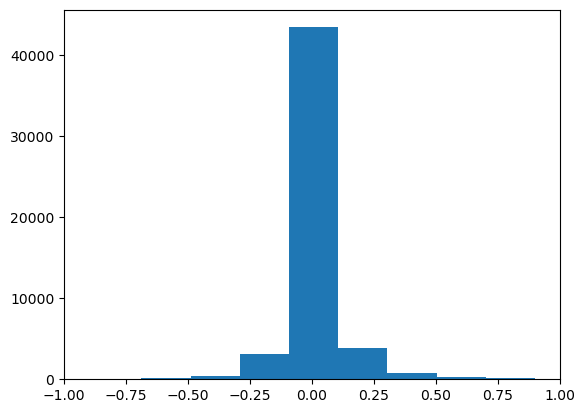

In [46]:
plt.hist(x=df['logerror'], bins=50)
plt.xlim(-1, 1)

## Question 3

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [47]:
def count_nulls(df):
    
    new_columns = ['name', 'missing_rows', 'percent_missing_rows']
    
    new_df = pd.DataFrame(columns = new_columns)
    
    for column in list(df.columns):
        missing = df[column].isna().sum()
        percent_missing = missing / df.shape[0]

        add_df = pd.DataFrame([{'name':column, 
                                'missing_rows': missing,
                                'percent_missing_rows' : percent_missing
                               }])
        
        new_df = pd.concat([new_df, add_df], axis=0)
    
    new_df.set_index('name', inplace = True)
        
    return new_df
        

In [48]:
newdf = count_nulls(df)

In [52]:
newdf

,missing_rows,percent_missing_rows
name,,
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,38704,0.74
architecturalstyletypeid,52249,1.00
basementsqft,52272,1.00
...,...,...
buildingclassdesc,52319,1.00
heatingorsystemdesc,18470,0.35
propertylandusedesc,0,0.00


In [50]:
newdf.shape

(68, 2)

# Prepare

## Question 1.
Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.